## About Dataset:-
|Features|Description|
|-----|-----|
|id|Unique ID for every Customer|
|account_type|Account Type – current or saving|
|gender|Gender of customer|
|age|Age of customer|
|region_code|Code assigned to region of residence (has order)|
|cc_cons_apr|Credit card spend in April|
|dc_cons_apr|Debit card spend in April|
|cc_cons_may|Credit card spend in May|
|dc_cons_may|Debit card spend in May|
|cc_cons_jun|Credit card spend in June|
|dc_cons_jun|Debit card spend in June|
|cc_count_apr|Number of credit card transactions in April|
|cc_count_may|Number of credit card transactions in May|
|cc_count_jun|Number of credit card transactions in June|
|dc_count_apr|Number of debit card transactions in April|
|dc_count_may|Number of debit card transactions in May|
|dc_count_jun|Number of debit card transactions in June|
|card_lim|Maximum Credit Card Limit allocated|
|personal_loan_active|Active personal loan with other bank|
|vehicle_loan_active|Active Vehicle loan with other bank|
|personal_loan_closed|Closed personal loan in last 12 months|
|vehicle_loan_closed|Closed vehicle loan in last 12 months|
|investment_1|DEMAT investment in june|
|investment_2|fixed deposit investment in june|
|investment_3|Life Insurance investment in June|
|investment_4|General Insurance Investment in June|
|debit_amount_apr|Total amount debited for April|
|credit_amount_apr|Total amount credited for April|
|debit_count_apr|Total number of times amount debited in april|
|credit_count_apr|Total number of times amount credited in april|
|max_credit_amount_apr|Maximum amount credited in April|
|debit_amount_may|Total amount debited for May|
|credit_amount_may|Total amount credited for May|
|credit_count_may|Total number of times amount credited in May|
|debit_count_may|Total number of times amount debited in May|
|max_credit_amount_may|Maximum amount credited in May|
|debit_amount_jun|Total amount debited for June|
|credit_amount_jun|Total amount credited for June|
|credit_count_jun|Total number of times amount credited in June|
|debit_count_jun|Total number of times amount debited in June|
|max_credit_amount_jun|Maximum amount credited in June|
|loan_enq|Loan enquiry in last 3 months|
|emi_active|Monthly EMI paid to other bank for active loans|
|cc_cons|(Target) Average Credit Card Spend in next three months!|

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
#value Imputer
from sklearn.impute import SimpleImputer 
#Label encoding
from sklearn.preprocessing import LabelEncoder

In [2]:
path='./data/Train.csv'
df=pd.read_csv(path)
df

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,12554,saving,F,36,336.00,10740.54,26271.58,12332.39,4.00,6.00,12.00,1.00,1.00,3.00,248145.00,nan,nan,nan,nan,nan,nan,nan,nan,73179.47,637691.33,0.00,2.00,471134.27,436171.36,733348.56,2.00,1.00,110403.21,1114847.37,686870.60,2.00,1.00,161824.47,NaN,1946.00
1,17645,current,M,24,529.00,15400.27,16346.51,13308.84,14.00,10.00,31.00,7.00,5.00,11.00,24005.00,nan,nan,nan,nan,nan,nan,nan,nan,405375.60,182564.04,20.00,4.00,424970.39,629510.47,140978.45,2.00,17.00,336653.55,401066.63,236839.53,10.00,31.00,530033.85,NaN,66784.00
2,7604,current,M,34,541.00,nan,16616.79,8165.06,19.00,8.00,23.00,nan,9.00,8.00,55953.00,nan,nan,nan,nan,nan,nan,nan,nan,422194.83,435950.01,28.00,3.00,120890.57,616448.41,370850.54,4.00,22.00,359000.88,894453.37,1896231.10,5.00,24.00,481495.65,Y,14469.00
3,1590,current,M,39,523.00,15962.46,17848.55,28502.69,nan,1.00,17.00,3.00,5.00,16.00,406984.00,nan,nan,nan,1.00,nan,nan,nan,nan,33573.88,540109.58,43.00,5.00,435724.52,280011.28,260148.10,6.00,39.00,217724.54,1772800.59,1276361.80,7.00,37.00,536714.94,NaN,6494.00
4,16556,current,M,28,239.00,nan,35662.00,13474.22,23.00,14.00,32.00,nan,5.00,14.00,34545.00,nan,nan,nan,nan,nan,nan,nan,nan,161189.08,306331.27,5.00,5.00,279918.41,206119.37,395626.13,4.00,15.00,519029.31,852574.01,611058.04,3.00,26.00,349316.59,NaN,14588.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,saving,F,34,217.00,nan,nan,nan,1.00,4.00,9.00,nan,nan,1.00,126427.00,nan,nan,nan,nan,nan,nan,nan,nan,44814.63,331104.55,14.00,7.00,538839.47,1022712.42,472207.92,3.00,15.00,41296.34,1897151.59,1834999.13,8.00,13.00,114839.24,NaN,15969.00
14996,10376,saving,M,38,744.00,12488.26,40933.69,nan,5.00,7.00,15.00,8.00,2.00,3.00,51060.00,nan,nan,1.00,nan,nan,nan,nan,nan,524072.00,141355.47,22.00,3.00,601235.89,939285.50,493598.54,2.00,20.00,146870.76,1538215.36,337796.20,5.00,16.00,120628.21,NaN,13346.00
14997,2181,current,M,25,242.00,nan,nan,nan,9.00,9.00,10.00,nan,nan,nan,4529.00,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,14967.00
14998,18417,current,M,27,738.00,3561.01,43857.59,nan,1.00,3.00,nan,7.00,1.00,1.00,5081.00,nan,nan,nan,nan,nan,nan,nan,nan,396243.48,nan,3.00,nan,nan,502493.87,86055.82,1.00,1.00,447798.93,1528777.55,947372.86,1.00,5.00,573334.38,NaN,20166.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null float64
dc_cons_apr              6387 non-null float64
dc_cons_may              7153 non-null float64
dc_cons_jun              5334 non-null float64
cc_count_apr             13915 non-null float64
cc_count_may             14470 non-null float64
cc_count_jun             14256 non-null float64
dc_count_apr             6387 non-null float64
dc_count_may             7153 non-null float64
dc_count_jun             7890 non-null float64
card_lim                 14991 non-null float64
personal_loan_active     1259 non-null float64
vehicle_loan_active      389 non-null float64
personal_loan_closed     1253 non-null float64
vehicle_loan_closed      711 non-null float

In [4]:
df.describe()

,ID,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
count,15000.00,15000.00,15000.00,6387.00,7153.00,5334.00,13915.00,14470.00,14256.00,6387.00,7153.00,7890.00,14991.00,1259.00,389.00,1253.00,711.00,643.00,1096.00,619.00,185.00,14356.00,13515.00,14249.00,14224.00,13517.00,14004.00,13522.00,14115.00,14115.00,13522.00,14052.00,14329.00,14343.00,14342.00,14329.00,15000.00
mean,10032.08,35.82,556.88,10923.11,23528.11,9118.92,9.06,9.49,19.19,5.29,6.41,8.06,124171.75,1.00,1.00,1.00,1.00,2689872.98,398701.40,63812.14,5565.77,446931.35,365496.28,15.15,3.78,331922.15,575456.70,569359.43,4.12,14.03,324182.84,1003264.69,986739.62,5.86,16.18,326093.47,12268.18
std,5760.37,8.38,192.65,11056.41,16522.53,9933.75,8.45,9.06,12.31,6.20,7.53,9.35,127449.92,0.00,0.00,0.00,0.00,3880940.18,507285.49,114297.52,6604.93,976611.46,570865.12,11.98,3.54,518244.27,564513.24,380742.06,4.01,11.53,222673.06,618720.05,608332.06,4.86,13.65,201609.02,11847.71
min,1.00,22.00,129.00,15.62,21.93,31.46,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4445.14,385.97,272.97,-10697.67,46.82,164.67,0.00,0.00,58.46,14.73,93.07,0.00,0.00,26.50,68.11,39.42,0.00,0.00,25.50,0.00
25%,5060.50,30.00,450.75,4832.87,11160.12,3923.84,3.00,3.00,10.00,1.00,2.00,2.00,45045.50,1.00,1.00,1.00,1.00,1160013.25,180050.52,26079.35,1197.59,170659.15,163131.65,6.00,2.00,149877.45,287216.13,284811.86,2.00,6.00,159221.35,498698.64,494357.11,3.00,6.00,160732.28,5435.00
50%,10054.00,34.00,566.00,9704.32,22829.80,7930.92,7.00,7.00,18.00,3.00,4.00,5.00,85488.00,1.00,1.00,1.00,1.00,2223757.71,352097.65,46250.99,5162.03,345751.51,327968.07,13.00,3.00,301281.23,564906.00,565210.24,3.00,11.00,321913.71,1004250.47,974102.16,5.00,13.00,323326.24,10810.00
75%,15015.25,39.00,710.00,14710.42,34492.06,12004.03,12.00,13.00,27.00,7.00,8.00,11.00,148343.50,1.00,1.00,1.00,1.00,3287304.75,545526.51,69730.28,8394.05,520451.30,494079.74,21.00,5.00,456476.54,837408.70,848973.04,5.00,19.00,482159.92,1493722.25,1476864.68,7.00,22.00,486134.94,16394.00
max,19998.00,223.00,977.00,361712.82,343536.31,292828.34,100.00,130.00,137.00,62.00,71.00,98.00,960458.00,1.00,1.00,1.00,1.00,47263208.50,13219264.93,1480565.99,35322.42,13485542.30,13043190.06,141.00,78.00,11987346.04,21778136.25,21370427.81,71.00,171.00,12760411.23,27378281.01,25895637.03,94.00,162.00,3147873.58,237021.00


In [5]:
df.isnull().sum()

ID                           0
account_type                 0
gender                       0
age                          0
region_code                  0
dc_cons_apr               8613
dc_cons_may               7847
dc_cons_jun               9666
cc_count_apr              1085
cc_count_may               530
cc_count_jun               744
dc_count_apr              8613
dc_count_may              7847
dc_count_jun              7110
card_lim                     9
personal_loan_active     13741
vehicle_loan_active      14611
personal_loan_closed     13747
vehicle_loan_closed      14289
investment_1             14357
investment_2             13904
investment_3             14381
investment_4             14815
debit_amount_apr           644
credit_amount_apr         1485
debit_count_apr            751
credit_count_apr           776
max_credit_amount_apr     1483
debit_amount_may           996
credit_amount_may         1478
credit_count_may           885
debit_count_may            885
max_cred

In [6]:
#filling null values
def numeric_features(df):
    numeric_col = df.select_dtypes(include=np.number).columns.tolist()
    return df[numeric_col].head()

numeric_columns = numeric_features(df)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

Numeric Features:
      ID  age  region_code  dc_cons_apr  dc_cons_may  dc_cons_jun  \
0  12554   36       336.00     10740.54     26271.58     12332.39   
1  17645   24       529.00     15400.27     16346.51     13308.84   
2   7604   34       541.00          nan     16616.79      8165.06   
3   1590   39       523.00     15962.46     17848.55     28502.69   
4  16556   28       239.00          nan     35662.00     13474.22   

   cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  \
0          4.00          6.00         12.00          1.00          1.00   
1         14.00         10.00         31.00          7.00          5.00   
2         19.00          8.00         23.00           nan          9.00   
3           nan          1.00         17.00          3.00          5.00   
4         23.00         14.00         32.00           nan          5.00   

   dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  \
0          3.00 248145.00                   

In [7]:
#filling null values in all numeric features
for i in numeric_columns.columns.tolist():
    df[i].fillna(0,inplace=True)

In [8]:
#Impute values in card limit column using mean strategy
df['card_lim']=df['card_lim'].fillna(df['card_lim'].mean)
df.isnull().sum()
df

ID                           0
account_type                 0
gender                       0
age                          0
region_code                  0
dc_cons_apr                  0
dc_cons_may                  0
dc_cons_jun                  0
cc_count_apr                 0
cc_count_may                 0
cc_count_jun                 0
dc_count_apr                 0
dc_count_may                 0
dc_count_jun                 0
card_lim                     0
personal_loan_active         0
vehicle_loan_active          0
personal_loan_closed         0
vehicle_loan_closed          0
investment_1                 0
investment_2                 0
investment_3                 0
investment_4                 0
debit_amount_apr             0
credit_amount_apr            0
debit_count_apr              0
credit_count_apr             0
max_credit_amount_apr        0
debit_amount_may             0
credit_amount_may            0
credit_count_may             0
debit_count_may              0
max_cred

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,12554,saving,F,36,336.00,10740.54,26271.58,12332.39,4.00,6.00,12.00,1.00,1.00,3.00,248145.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,73179.47,637691.33,0.00,2.00,471134.27,436171.36,733348.56,2.00,1.00,110403.21,1114847.37,686870.60,2.00,1.00,161824.47,NaN,1946.00
1,17645,current,M,24,529.00,15400.27,16346.51,13308.84,14.00,10.00,31.00,7.00,5.00,11.00,24005.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,405375.60,182564.04,20.00,4.00,424970.39,629510.47,140978.45,2.00,17.00,336653.55,401066.63,236839.53,10.00,31.00,530033.85,NaN,66784.00
2,7604,current,M,34,541.00,0.00,16616.79,8165.06,19.00,8.00,23.00,0.00,9.00,8.00,55953.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,422194.83,435950.01,28.00,3.00,120890.57,616448.41,370850.54,4.00,22.00,359000.88,894453.37,1896231.10,5.00,24.00,481495.65,Y,14469.00
3,1590,current,M,39,523.00,15962.46,17848.55,28502.69,0.00,1.00,17.00,3.00,5.00,16.00,406984.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,33573.88,540109.58,43.00,5.00,435724.52,280011.28,260148.10,6.00,39.00,217724.54,1772800.59,1276361.80,7.00,37.00,536714.94,NaN,6494.00
4,16556,current,M,28,239.00,0.00,35662.00,13474.22,23.00,14.00,32.00,0.00,5.00,14.00,34545.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,161189.08,306331.27,5.00,5.00,279918.41,206119.37,395626.13,4.00,15.00,519029.31,852574.01,611058.04,3.00,26.00,349316.59,NaN,14588.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,saving,F,34,217.00,0.00,0.00,0.00,1.00,4.00,9.00,0.00,0.00,1.00,126427.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44814.63,331104.55,14.00,7.00,538839.47,1022712.42,472207.92,3.00,15.00,41296.34,1897151.59,1834999.13,8.00,13.00,114839.24,NaN,15969.00
14996,10376,saving,M,38,744.00,12488.26,40933.69,0.00,5.00,7.00,15.00,8.00,2.00,3.00,51060.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,524072.00,141355.47,22.00,3.00,601235.89,939285.50,493598.54,2.00,20.00,146870.76,1538215.36,337796.20,5.00,16.00,120628.21,NaN,13346.00
14997,2181,current,M,25,242.00,0.00,0.00,0.00,9.00,9.00,10.00,0.00,0.00,0.00,4529.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,14967.00
14998,18417,current,M,27,738.00,3561.01,43857.59,0.00,1.00,3.00,0.00,7.00,1.00,1.00,5081.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,396243.48,0.00,3.00,0.00,0.00,502493.87,86055.82,1.00,1.00,447798.93,1528777.55,947372.86,1.00,5.00,573334.38,NaN,20166.00


In [9]:
#categorical columns
def categorical_features(df):
    categorical_col = df.select_dtypes(exclude=np.number).columns.tolist()
    return df[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

Categorical Features:
  account_type gender loan_enq
0       saving      F      NaN
1      current      M      NaN
2      current      M        Y
3      current      M      NaN
4      current      M      NaN


In [10]:
#LabelEncoding categorical features
#encoding account_type coulmn
#1=saving , 0=current
#encode=LabelEncoder()
#df['account_type']=encode.fit_transform(df['account_type'])
#for Gender column
#0=female,1=male
#df['gender']=encode.fit_transform(df['gender'])
#df


In [11]:
#creating total investment columns
df['Total_investment']=df['investment_1']+df['investment_2']+df['investment_3']+df['investment_4']
df['Total_investment'].value_counts()

0.00          12643
154851.35         1
737964.20         1
814.99            1
709360.63         1
              ...  
306125.49         1
319427.33         1
31501.54          1
521614.16         1
1241832.92        1
Name: Total_investment, Length: 2358, dtype: int64

In [12]:
#using pd.cut() for binning of age columns
#Adaptive binning on 'Age' using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['age'].quantile(quantile_list)
quantile_labels = ['22-30', '31-34', '35-39', '> 40']
df['age_group'] = pd.qcut(df['age'], q=quantile_list, labels=quantile_labels)
# view the binned features
df.head(10)
    

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons,Total_investment,age_group
0,12554,saving,F,36,336.00,10740.54,26271.58,12332.39,4.00,6.00,12.00,1.00,1.00,3.00,248145.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,73179.47,637691.33,0.00,2.00,471134.27,436171.36,733348.56,2.00,1.00,110403.21,1114847.37,686870.60,2.00,1.00,161824.47,NaN,1946.00,0.00,35-39
1,17645,current,M,24,529.00,15400.27,16346.51,13308.84,14.00,10.00,31.00,7.00,5.00,11.00,24005.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,405375.60,182564.04,20.00,4.00,424970.39,629510.47,140978.45,2.00,17.00,336653.55,401066.63,236839.53,10.00,31.00,530033.85,NaN,66784.00,0.00,22-30
2,7604,current,M,34,541.00,0.00,16616.79,8165.06,19.00,8.00,23.00,0.00,9.00,8.00,55953.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,422194.83,435950.01,28.00,3.00,120890.57,616448.41,370850.54,4.00,22.00,359000.88,894453.37,1896231.10,5.00,24.00,481495.65,Y,14469.00,0.00,31-34
3,1590,current,M,39,523.00,15962.46,17848.55,28502.69,0.00,1.00,17.00,3.00,5.00,16.00,406984.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,33573.88,540109.58,43.00,5.00,435724.52,280011.28,260148.10,6.00,39.00,217724.54,1772800.59,1276361.80,7.00,37.00,536714.94,NaN,6494.00,0.00,35-39
4,16556,current,M,28,239.00,0.00,35662.00,13474.22,23.00,14.00,32.00,0.00,5.00,14.00,34545.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,161189.08,306331.27,5.00,5.00,279918.41,206119.37,395626.13,4.00,15.00,519029.31,852574.01,611058.04,3.00,26.00,349316.59,NaN,14588.00,0.00,22-30
5,19106,current,M,25,694.00,8105.75,0.00,0.00,22.00,38.00,45.00,4.00,0.00,0.00,77860.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,195530.99,129745.83,7.00,3.00,254246.23,794784.09,334022.05,3.00,7.00,89838.96,1362427.96,1854398.30,4.00,9.00,298456.51,NaN,13470.00,0.00,22-30
6,10086,saving,M,39,275.00,0.00,4501.69,7955.97,6.00,8.00,25.00,0.00,1.00,1.00,184572.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,245849.93,416937.17,9.00,2.00,424620.66,878626.45,894922.81,2.00,12.00,496770.52,356506.21,716919.46,4.00,9.00,218319.50,NaN,4962.00,0.00,35-39
7,3045,saving,M,35,267.00,0.00,0.00,0.00,56.00,65.00,84.00,0.00,0.00,0.00,35769.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,327202.68,56018.93,15.00,2.00,413987.21,556187.03,326135.77,5.00,8.00,482161.33,1163090.48,1154114.85,2.00,5.00,251899.69,NaN,12695.00,0.00,35-39
8,17368,saving,M,34,306.00,0.00,0.00,0.00,5.00,4.00,3.00,0.00,0.00,0.00,20831.00,0.00,0.00,0.00,0.00,383553.64,0.00,0.00,0.00,484539.54,155763.90,30.00,2.00,316797.05,197213.41,254647.11,3.00,20.00,278155.70,97996.75,1200548.88,5.00,12.00,7327.20,NaN,49129.00,383553.64,31-34
9,9756,current,M,35,523.00,0.00,4379.36,7696.58,0.00,6.00,29.00,0.00,1.00,2.00,121436.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,424895.57,406717.44,29.00,6.00,173755.68,494998.67,245840.69,7.00,15.00,488987.23,965258.57,700097.46,2.00,12.00,403891.49,NaN,5772.00,0.00,35-39


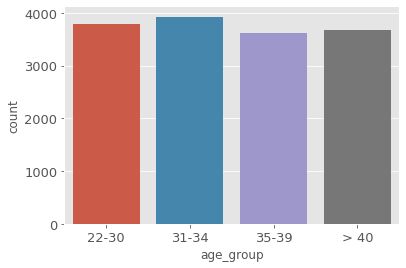

In [13]:
#plotting histogrm of age column
sns.countplot(df['age_group'])

* after observing the above plot we can see that the age group of (31-34)years do more card transactions as compared to people of other age groups

##  debit card and credit card Transaction count

<Figure size 1152x432 with 0 Axes>

Text(0.5, 1.0, 'Count of cards used according to month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Count')

,index,count,month_name,type
0,cc_count_apr,126120.00,APR,Credit
1,cc_count_may,137364.00,MAY,Credit
2,cc_count_jun,273523.00,JUN,Credit
3,dc_count_apr,33756.00,APR,Debit
4,dc_count_may,45820.00,MAY,Debit
5,dc_count_jun,63565.00,JUN,Debit


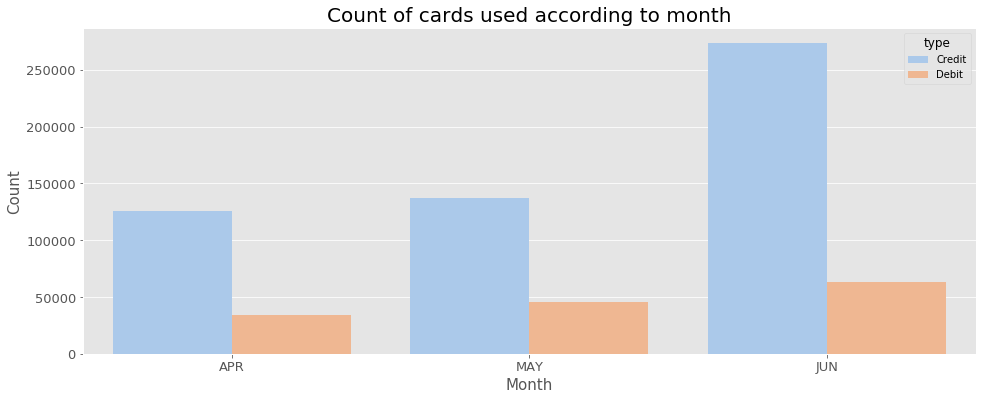

In [60]:
#creating  dataframe for debit card count and credit card count
count_df = df[['cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun']].sum().reset_index().rename(columns={0:'count'})
count_df['month_name'] = count_df['index'].apply(lambda x: x.split('_')[2]).str.upper()
count_df['type'] = 'Debit'
count_df.loc[0:2,'type'] = 'Credit'

plt.figure(figsize=(16,6))
ax = sns.barplot(x='month_name', y='count', data=count_df, hue='type', palette='pastel')
ax.set_title('Count of cards used according to month', fontsize=20);
ax.set_xlabel('Month', fontsize=15);
ax.set_ylabel('Count', fontsize=15);
count_df

* After observing the above count we can make out that cmb bank customers are using credit card more than debit card.
* one can also observe that for both debit and credit card the number of transaction is increasing for each month.
* It also seems like people are happy with credit card of cmb bank because they might be getting more rewards like cashbacks and discount for transaction made with credit card  
* The usage of debit card is less it might be possible that people might be having less savings in their bank account

## Lets find out the average credit card limit

In [54]:
df['card_lim'].mean()

124097.25106666666

age_group
22-30   249327042.00
31-34   366153189.00
35-39   501483776.00
> 40    744494759.00
Name: card_lim, dtype: float64

Text(0.5, 0, 'Age group')

Text(0, 0.5, 'card limit amount')

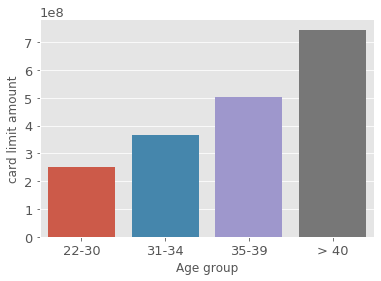

In [106]:
#A=df[['age_group','card_lim']]
B=df.groupby('age_group')['card_lim'].sum()
B
label=B.index
value=B.values
sns.barplot(x=label,y=value)
plt.xlabel('Age group')
plt.ylabel('card limit amount')

* After observing this plot we can see that as the age increases,the credit card limit amount is also increasing exponentially.


## Loan status of bank members

In [141]:
df2=df[['gender','personal_loan_active']]

df2=df2[df2['personal_loan_active']==1]
df2=df2[df2['gender']=='M']
df2

,gender,personal_loan_active
27,M,1.00
70,M,1.00
76,M,1.00
99,M,1.00
103,M,1.00
...,...,...
14920,M,1.00
14922,M,1.00
14936,M,1.00
14952,M,1.00
